the number of childNodes associated with DNA is 8651
the number of childNodes associated with RNA is 11004
the number of childNodes associated with protein is 33459
the number of childNodes associated with  carbohydrate is 4874


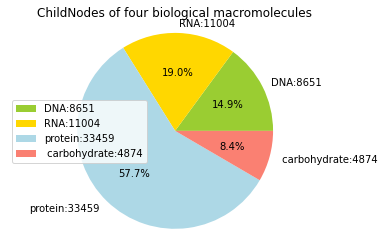

In [20]:
import os
import re
os.chdir("/Users/mac/Desktop/H.X./study/IBI/大一（下）/PRACTICAL/Practical 14")
from xml.dom.minidom import parse
import xml.dom.minidom
DOMTree = xml.dom.minidom.parse("go_obo.xml")
collection = DOMTree.documentElement
terms = collection.getElementsByTagName("term")

#The locals() function will return all the local variables at the current position in dictionary type.
name = locals()

#Define a function that can get terms containing specific string in 'defstr'.
def find_specific_term(str):
    name[str+'_list'] = []
    for i in terms:
        defstr = i.getElementsByTagName('defstr')[0].childNodes[0].data
        if re.search(str, defstr):
            term_id = i.getElementsByTagNameNS(i.namespaceURI, 'id')[0].childNodes[0].data
            name[str+'_list'].append(term_id)
    
class Node:
    def __init__(self, id, child = [], father = []): #Node object have three attributes: id, child, father.
        self.id = id
        self.child = child
        self.father = father
        
name = locals()
Nodes = []
for term in terms:
    term_id = term.getElementsByTagNameNS(term.namespaceURI, 'id')[0].childNodes[0].data
    is_a_list = []
    for id in term.getElementsByTagNameNS(term.namespaceURI, 'is_a'):
        is_a_list.append(id.childNodes[0].data)
    name[''+term_id] = Node(term_id, [], is_a_list) #endow Node object with 'id' & 'is_a'(father value)
    Nodes.append(name[''+term_id])
for Node in Nodes:
    for father_id in Node.father:
        name[''+father_id].child.append(Node.id)

#Define a recursive function that find every descendant of a given Node.
def find_descendant(Node):
    for child in Node.child:
        descendant.append(child)
        find_descendant(name[''+child])
    return descendant

#The forth macromolecule: carbohydrate.

#To find all terms that contain 'DNA', 'RNA', 'protein', ' carbohydrate' in 'defstr'.
molecule_list = ['DNA', 'RNA', 'protein', ' carbohydrate']
for molecule in molecule_list:
    find_specific_term(molecule)

#count the number of childNodes of four macromolecules
count_list = []

for molecule in molecule_list:
    descendant = []
    AllDes = set() #Save all the desendants into a set
    for element in name[molecule+'_list']:
        if not element in AllDes:
            AllDes = AllDes.union(find_descendant(name[''+element]))    #joint all the desendents of a single rootNode into the set
    #Output name and childNodes number
    print('the number of childNodes associated with '+molecule+' is '+str(len(AllDes)))
    name[molecule+'_count'] = len(AllDes)
    count_list.append(name[molecule+'_count'])
    
    
    
#==============================================================================================#



#pie chart drawing
import matplotlib.pyplot as plt
labels = []
for molecule in molecule_list:
    label = molecule+':'+str(name[molecule+'_count'])
    labels.append(label)

labels = tuple(labels)
sizes = count_list
colors = ['yellowgreen','gold','lightblue','salmon']
plt.pie(sizes, colors = colors, autopct = '%1.1f%%', shadow = False, labels = labels)
plt.legend(patches, labels, loc="center left")
plt.axis('equal')
plt.title('ChildNodes of four biological macromolecules')

plt.show()